In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
path = '/home/zane/Documents/code/research/uw2020/masuite/tmp/masuite/masuite_id__cartpole_simplepg-0.csv'
df = pd.read_csv(path)

In [36]:
df.head()

,agent0_grad_norms,agent0_avg_rets,agent0_avg_lens,agent0_loss
0,"[3.6465539932250977, 0.9225412607192993, 8.493...",24.704433,24.704433,23.574938
1,"[4.445135593414307, 1.1626895666122437, 10.178...",26.812834,26.812834,27.739611
2,"[4.303347587585449, 1.1983530521392822, 9.4300...",25.671795,25.671795,24.974813
3,"[5.033361434936523, 1.49270761013031, 10.51794...",27.053763,27.053763,28.995085
4,"[4.924530029296875, 1.6881932020187378, 9.8040...",25.927461,25.927461,27.475410


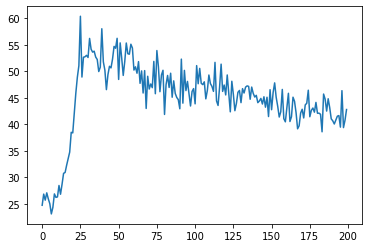

In [37]:
plt.plot(df['agent0_avg_rets'])

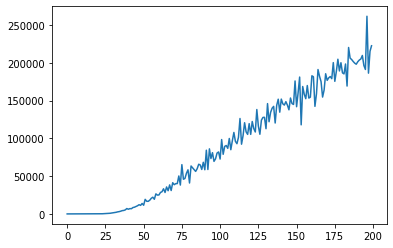

In [38]:
plt.plot(df['agent0_loss'])

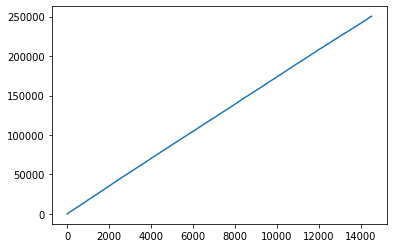

In [56]:
plt.plot(np.array(df['agent0_total_ret']))

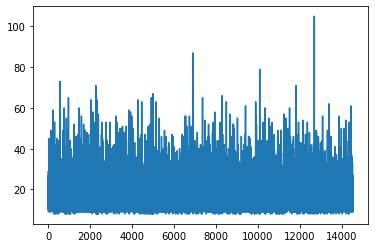

In [57]:
plt.plot(df['agent0_episode_ret'])

<AxesSubplot:>

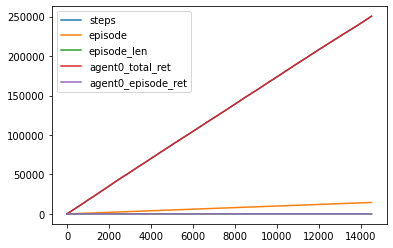

In [58]:
df.plot()